In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Data Labels Information
**Mushroom Data**: Attribute Information: (classes: edible=e, poisonous=p)

**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises**: bruises=t,no=f

**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment**: attached=a,descending=d,free=f,notched=n

**gill-spacing**: close=c,crowded=w,distant=d

**gill-size**: broad=b,narrow=n

**gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape**: enlarging=e,tapering=t

**stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type**: partial=p,universal=u

**veil-color**: brown=n,orange=o,white=w,yellow=y

**ring-number**: none=n,one=o,two=t

**ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Importing Training Data and Training Labels

In [20]:
X_train_data = pd.read_csv("mushroom_trn_data.csv")
X_train_labels = pd.read_csv("mushroom_trn_class_labels.csv", names=["column", 'class'])
X_train_data.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [21]:
X_train_labels.shape

(7311, 2)

In [22]:
X_train_labels.head(100)

,column,class
0,d1,e
1,d2,e
2,d3,e
3,d4,p
4,d5,p
...,...,...
95,d96,p
96,d97,p
97,d98,e
98,d99,p


In [23]:
X_train_data.shape

(7311, 22)

In [24]:
X_train_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,y,g,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,n,y,d
1,f,f,e,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,v,d
2,f,s,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,k,a,g
3,x,s,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,v,d
4,x,s,n,f,s,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p


In [25]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 7311 non-null   object
 1   cap-surface               7311 non-null   object
 2   cap-color                 7311 non-null   object
 3   bruises                   7311 non-null   object
 4   odor                      7311 non-null   object
 5   gill-attachment           7311 non-null   object
 6   gill-spacing              7311 non-null   object
 7   gill-size                 7311 non-null   object
 8   gill-color                7311 non-null   object
 9   stalk-shape               7311 non-null   object
 10  stalk-root                7311 non-null   object
 11  stalk-surface-above-ring  7311 non-null   object
 12  stalk-surface-below-ring  7311 non-null   object
 13  stalk-color-above-ring    7311 non-null   object
 14  stalk-color-below-ring  

In [26]:
X_train_labels.head()

,column,class
0,d1,e
1,d2,e
2,d3,e
3,d4,p
4,d5,p


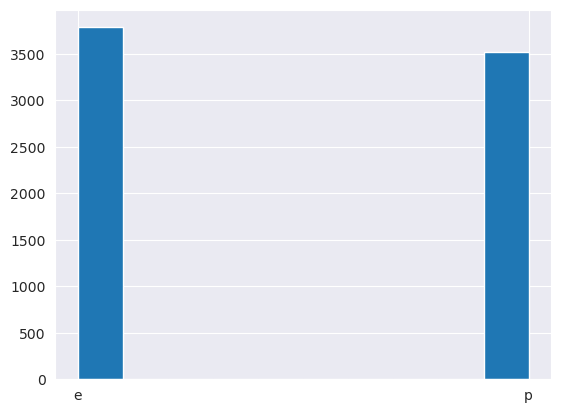

In [27]:
X_train_labels["class"].hist()
plt.show()

In [28]:
for i in list(X_train_data.columns):
    print("The unique values in ", i)
    print(X_train_data[i].unique())
    print('\n\n\n')

The unique values in  cap-shape
['f' 'x' 'k' 'b' 's' 'c']




The unique values in  cap-surface
['y' 'f' 's' 'g']




The unique values in  cap-color
['g' 'e' 'w' 'n' 'y' 'p' 'r' 'b' 'c' 'u']




The unique values in  bruises
['t' 'f']




The unique values in  odor
['n' 'c' 's' 'l' 'a' 'f' 'p' 'y' 'm']




The unique values in  gill-attachment
['f' 'a']




The unique values in  gill-spacing
['c' 'w']




The unique values in  gill-size
['b' 'n']




The unique values in  gill-color
['n' 'p' 'h' 'u' 'b' 'k' 'w' 'g' 'r' 'y' 'e' 'o']




The unique values in  stalk-shape
['t' 'e']




The unique values in  stalk-root
['b' 'e' '?' 'c' 'r']




The unique values in  stalk-surface-above-ring
['s' 'k' 'f' 'y']




The unique values in  stalk-surface-below-ring
['s' 'f' 'k' 'y']




The unique values in  stalk-color-above-ring
['p' 'g' 'w' 'b' 'n' 'o' 'e' 'y' 'c']




The unique values in  stalk-color-below-ring
['w' 'g' 'p' 'e' 'n' 'b' 'o' 'y' 'c']




The unique values in  veil-type
['p']


In [29]:
y = X_train_labels.drop('column', axis = 1)

*Changing the missing values to np.nan in the training data*

In [30]:
X_train_data['stalk-root'] = X_train_data['stalk-root'].replace('?', np.nan)

In [31]:
X_train_data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2235
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [32]:
from Data_loader import dummy_enc

In [33]:
X_train_data_enc = dummy_enc(X_train_data)

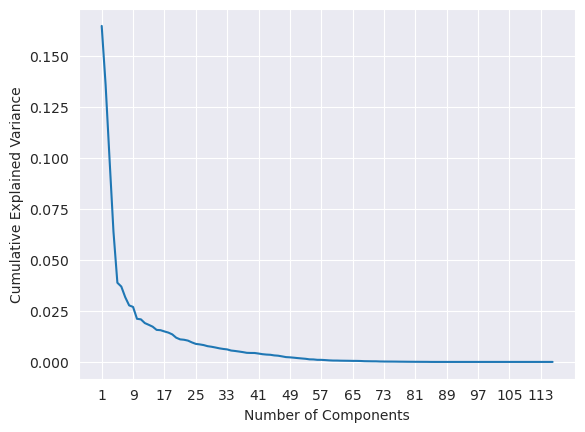

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X_train_data_enc)  # X is your data matrix
Y = np.arange(1, 117)
xtic = np.arange(1, 117, 8)
plt.plot(Y, pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(xtic)
plt.show()

In [35]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

n_features = X_train_data_enc.shape[1]  # Number of features in your data
components_to_test = range(1, n_features + 1)
best_score = -np.inf
best_n_components = None

for n_components in components_to_test:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train_data_enc)

    model = LogisticRegression()  # or any other model
    score = cross_val_score(model, X_pca, np.array(y).ravel(), cv=5, n_jobs=-1).mean()

    if score > best_score:
        best_score = score
        best_n_components = n_components

print("Best number of components:", best_n_components)


Best number of components: 69


In [36]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import numpy as np

n_features = X_train_data_enc.shape[1]  # Number of features in your data
components_to_test = range(1, n_features + 1)
best_score = -np.inf
best_n_components = None

for n_components in components_to_test:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train_data_enc)
    
    model = RandomForestClassifier() 
    score = cross_val_score(model, X_pca, np.array(y).ravel(), cv=5, n_jobs=-1).mean()
    
    if score > best_score:
        best_score = score
        best_n_components = n_components

print("Best number of components:", best_n_components)


Best number of components: 10


In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import numpy as np

n_features = X_train_data_enc.shape[1]  # Number of features in your data
components_to_test = range(1, n_features + 1)
best_score = -np.inf
best_n_components = None

for n_components in components_to_test:
    pca = KernelPCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train_data_enc)
    
    model = RandomForestClassifier() 
    score = cross_val_score(model, X_pca, np.array(y).ravel(), cv=5).mean()
    
    if score > best_score:
        best_score = score
        best_n_components = n_components

print("Best number of components:", best_n_components)